In [1]:
library(MASS)
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [2]:
data(Boston)
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


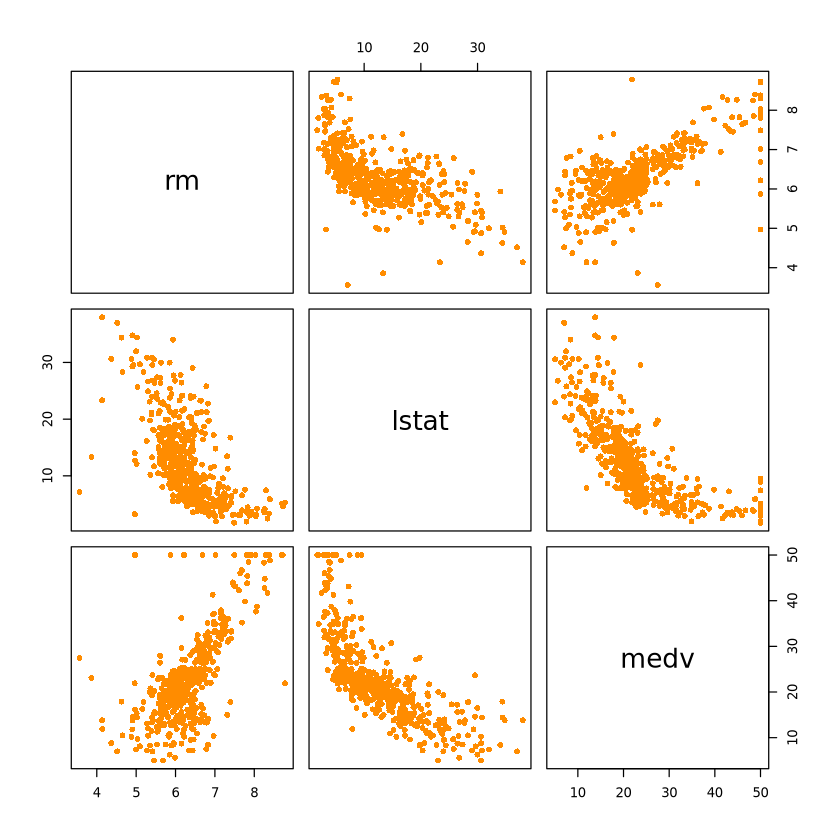

In [16]:
pairs(Boston[, which(colnames(Boston) %in% c("medv", "rm", "lstat"))], pch = 16, col = "darkorange", cex.axis = 1, cex = 1)

In [20]:
c('a','b') %in% c('a','b')

[1] TRUE TRUE

In [22]:
cor(Boston[, which(colnames(Boston) %in% c("medv", "rm", "lstat"))])  ## 순서대로 뽑아내기 위해서 이렇게 한듯

,rm,lstat,medv
rm,1.0000000,-0.6138083,0.6953599
lstat,-0.6138083,1.0000000,-0.7376627
medv,0.6953599,-0.7376627,1.0000000


In [24]:
model <- lm(medv~rm+lstat, Boston)
summary(model)


Call:
lm(formula = medv ~ rm + lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.076  -3.516  -1.010   1.909  28.131 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.35827    3.17283  -0.428    0.669    
rm           5.09479    0.44447  11.463   <2e-16 ***
lstat       -0.64236    0.04373 -14.689   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.54 on 503 degrees of freedom
Multiple R-squared:  0.6386,	Adjusted R-squared:  0.6371 
F-statistic: 444.3 on 2 and 503 DF,  p-value: < 2.2e-16


In [27]:
fitted(model) |> head()

1        2        3        4        5        6 
28.94101 25.48421 32.65907 32.40652 31.63041 28.05453

In [28]:
anova(model)  ## SSR, SSE

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
rm,1,20654.42,20654.41622,672.9039,8.266887e-95
lstat,1,6622.57,6622.56999,215.7579,6.669365e-41
Residuals,503,15439.31,30.69445,NA,NA


In [29]:
Null_model <- lm(medv~1, Boston)
anova(Null_model)  ## SST

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Residuals,505,42716.3,84.58672,NA,NA


In [30]:
anova(Null_model, model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,505,42716.30,NA,NA,NA,NA
2,503,15439.31,2,27276.99,444.3309,7.008455e-112


In [32]:
confint(model, level = 0.95)

,2.5 %,97.5 %
(Intercept),-7.5919003,4.8753547
rm,4.2215504,5.9680255
lstat,-0.7282772,-0.5564395


In [33]:
vcov(model)  ## cov mat

,(Intercept),rm,lstat
(Intercept),10.06683612,-1.39248641,-0.099178133
rm,-1.39248641,0.19754958,0.011930670
lstat,-0.09917813,0.01193067,0.001912441


평균반응 / 개별 y

In [34]:
new_dt <- data.frame(rm = 7, lstat = 10)
new_dt

rm,lstat
<dbl>,<dbl>
7,10


In [37]:
x_0 <- c(1,7,10)

## t(x_0)%*%solve_XX%*%x_0*MSE

In [35]:
predict(model, new_dt, interval = "confidence", level = 0.95)

,fit,lwr,upr
1,27.88166,27.17347,28.58985


In [36]:
predict(model, new_dt, interval = "prediction", level = 0.95)

,fit,lwr,upr
1,27.88166,16.97375,38.78957


In [38]:
resid <- model$residuals

In [39]:
bptest(model)  ## 등분산성 검정


	studentized Breusch-Pagan test

data:  model
BP = 1.5297, df = 2, p-value = 0.4654


In [41]:
shapiro.test(resid)  ## 정규성 검정


	Shapiro-Wilk normality test

data:  resid
W = 0.9098, p-value < 2.2e-16


In [47]:
dwtest(model, alternative = "two.sided")  ## 자기상관 검정


	Durbin-Watson test

data:  model
DW = 0.83421, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is not 0


In [48]:
dwtest(model)


	Durbin-Watson test

data:  model
DW = 0.83421, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


> 양의 상관이 있음

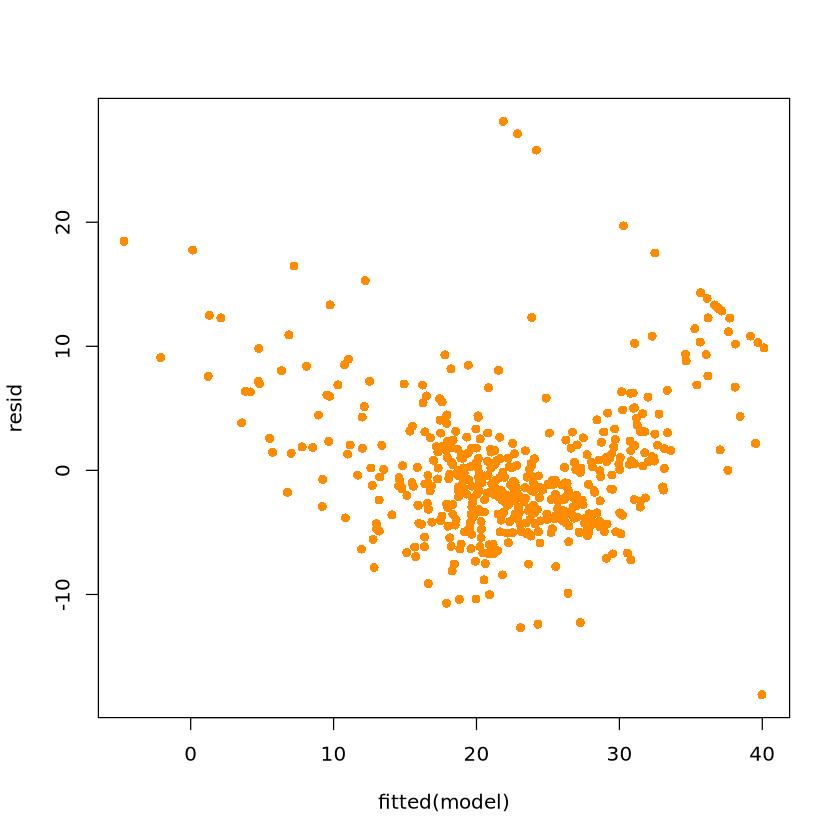

In [50]:
plot(fitted(model), resid, pch = 16, col = "darkorange")